In [1]:
# plot_ellipses에 필요한 모듈
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

In [2]:
# montecarlo에 필요한 모듈
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Ellipse 모듈을 이용하여 두 타원 그래프 그리는 함수

def plot_ellipses_by_module(a1,b1,x1,y1,theta1,a2,b2,x2,y2,theta2):
    fig, ax = plt.subplots()

    # Create first ellipse and add to plot
    ellipse1 = Ellipse(xy=(float(x1), float(y1)), width=float(a1)*2, height=float(b1)*2, angle=float(theta1))
    x1_min = ellipse1.center[0] - ellipse1.width
    x1_max = ellipse1.center[0] + ellipse1.width
    y1_min = ellipse1.center[1] - ellipse1.height
    y1_max = ellipse1.center[1] + ellipse1.height
    ellipse1.set_alpha(0.2)
    ax.add_patch(ellipse1)

    # Create second ellipse and add to plot
    ellipse2 = Ellipse(xy=(float(x2), float(y2)), width=float(a2)*2, height=float(b2)*2, angle=float(theta2))
    x2_min = ellipse2.center[0] - ellipse2.width
    x2_max = ellipse2.center[0] + ellipse2.width
    y2_min = ellipse2.center[1] - ellipse2.height
    y2_max = ellipse2.center[1] + ellipse2.height
    ellipse2.set_alpha(0.2)
    ax.add_patch(ellipse2)

    x_min=min(x1_min,x2_min)
    x_max=max(x1_max,x2_max)
    y_min=min(y1_min,y2_min)
    y_max=max(y1_max,y2_max)

    ax.set_xlim([min(x1_min,x2_min),max(x1_max,x2_max)])
    ax.set_ylim([min(y1_min,y2_min),max(y2_max,y2_max)])
    plt.gca().set_aspect('equal')
    
    plt.show()

In [4]:
def plot_ellipse(a, b, x0, y0, theta):
    t = np.linspace(0, 2*np.pi, 1000)
    ellipse = np.array([a*np.cos(t), b*np.sin(t)])
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rotated_ellipse = rotation_matrix @ ellipse
    x = rotated_ellipse[0,:] + x0
    y = rotated_ellipse[1,:] + y0
    min_x=min(x)
    max_x=max(x)
    min_y=min(y)
    max_y=max(y)
    plt.plot(x, y)
    plt.gca().set_aspect('equal')
    return [min_x, max_x, min_y, max_y]

In [6]:
def area_of_overlap_with_plot(a1, b1, x1, y1, theta1, a2, b2, x2, y2, theta2, num_samples=1000):
    # theta 값들을 degree 값에서 radian 값으로 변환
    theta1=theta1*np.pi/180
    theta2=theta2*np.pi/180

    e1=plot_ellipse(a1, b1, x1, y1, theta1)
    e2=plot_ellipse(a2, b2, x2, y2, theta2)
    
    count = 0
    for i in range(num_samples):
        x = random.uniform(min(e1[0],e2[0]), max(e1[1],e2[1]))
        y = random.uniform(min(e1[2],e2[2]), max(e1[3],e2[3]))

        x1_new = (x - x1) * math.cos(-theta1) - (y - y1) * math.sin(-theta1) + x1
        y1_new = (y - y1) * math.cos(-theta1) + (x - x1) * math.sin(-theta1) + y1 # fixed x1_new to y2_new
        x2_new = (x - x2) * math.cos(-theta2) - (y - y2) * math.sin(-theta2) + x2
        y2_new = (y - y2) * math.cos(-theta2) + (x - x2) * math.sin(-theta2) + y2


        if ((x1_new-x1)**2/a1**2 + (y1_new-y1)**2/b1**2 <= 1) and ((x2_new-x2)**2/a2**2 + (y2_new-y2)**2/b2**2 <= 1):
            count += 1
            plt.scatter(x,y,c='r')
        elif (x1_new-x1)**2/a1**2 + (y1_new-y1)**2/b1**2 <= 1:
            plt.scatter(x,y,c='g')
        elif (x2_new-x2)**2/a2**2 + (y2_new-y2)**2/b2**2 <= 1:
            plt.scatter(x,y,c='b')
        else:
            plt.scatter(x,y,c='k')
            
    plt.show()

    return (count/num_samples)*(max(e1[1],e2[1])-min(e1[0],e2[0]))*(max(e1[3],e2[3])-min(e1[2],e2[2]))

In [5]:
def set_ellipse(a, b, x0, y0, theta):
    t = np.linspace(0, 2*np.pi, 1000)
    ellipse = np.array([a*np.cos(t), b*np.sin(t)])
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rotated_ellipse = rotation_matrix @ ellipse
    x = rotated_ellipse[0,:] + x0
    y = rotated_ellipse[1,:] + y0
    min_x=min(x)
    max_x=max(x)
    min_y=min(y)
    max_y=max(y)
    return [min_x, max_x, min_y, max_y]

In [7]:
# 몬테카를로 시뮬레이션으로 겹치는 넓이 계산 without plot

def area_of_overlap_without_plot(a1, b1, x1, y1, theta1, a2, b2, x2, y2, theta2, num_samples=1000):
    # theta 값들을 degree 값에서 radian 값으로 변환
    theta1=theta1*np.pi/180
    theta2=theta2*np.pi/180

    e1=set_ellipse(a1, b1, x1, y1, theta1)
    e2=set_ellipse(a2, b2, x2, y2, theta2)
    
    count = 0
    for i in range(num_samples):
        x = random.uniform(min(e1[0],e2[0]), max(e1[1],e2[1]))
        y = random.uniform(min(e1[2],e2[2]), max(e1[3],e2[3]))

        x1_new = (x - x1) * math.cos(-theta1) - (y - y1) * math.sin(-theta1) + x1
        y1_new = (y - y1) * math.cos(-theta1) + (x - x1) * math.sin(-theta1) + y1 # fixed x1_new to y2_new
        x2_new = (x - x2) * math.cos(-theta2) - (y - y2) * math.sin(-theta2) + x2
        y2_new = (y - y2) * math.cos(-theta2) + (x - x2) * math.sin(-theta2) + y2


        if ((x1_new-x1)**2/a1**2 + (y1_new-y1)**2/b1**2 <= 1) and ((x2_new-x2)**2/a2**2 + (y2_new-y2)**2/b2**2 <= 1):
            count += 1

    return (count/num_samples)*(max(e1[1],e2[1])-min(e1[0],e2[0]))*(max(e1[3],e2[3])-min(e1[2],e2[2]))

In [8]:
a1 = float(input("첫번째 타원의 x 반지름 : "))
b1 = float(input("첫번째 타원의 y 반지름 : "))
x1 = float(input("첫번째 타원의 중심 x 좌표 : "))
y1 = float(input("첫번째 타원의 중심 y 좌표 : "))
theta1 = float(input("첫번째 타원의 (반시계 방향)회전각(°) : "))

a2 = float(input("두번째 타원의 x 반지름 : "))
b2 = float(input("두번째 타원의 y 반지름 : "))
x2 = float(input("두번째 타원의 중심 x 좌표 : "))
y2 = float(input("두번째 타원의 중심 y 좌표 : "))
theta2 = float(input("두번째 타원의 (반시계 방향)회전각(°) : "))

첫번째 타원의 x 반지름 : 5
첫번째 타원의 y 반지름 : 7
첫번째 타원의 중심 x 좌표 : 45
첫번째 타원의 중심 y 좌표 : 69
첫번째 타원의 (반시계 방향)회전각(°) : 20
두번째 타원의 x 반지름 : 5
두번째 타원의 y 반지름 : 8
두번째 타원의 중심 x 좌표 : 56
두번째 타원의 중심 y 좌표 : 9
두번째 타원의 (반시계 방향)회전각(°) : 65


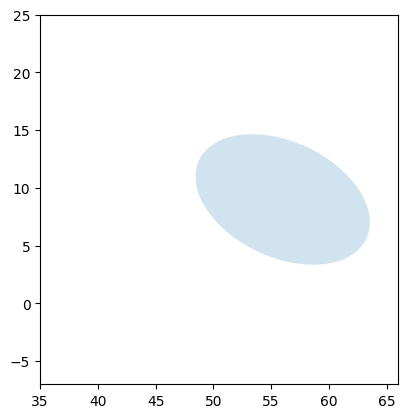

In [9]:
plot_ellipses_by_module(a1,b1,x1,y1,theta1,a2,b2,x2,y2,theta2)

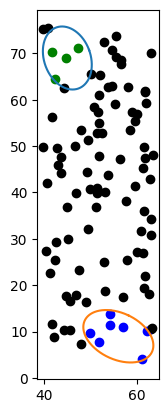

0.0


In [10]:
# with plot
area = area_of_overlap_with_plot(a1,b1,x1,y1,theta1,a2,b2,x2,y2,theta2,10000)
print(area)

In [11]:
# 반복문 사용하여 오차 줄이기
sum_area=0
for i in range(1000):
  area = area_of_overlap_without_plot(a1,b1,x1,y1,theta1,a2,b2,x2,y2,theta2,10000)
  sum_area=sum_area+area
print("타원의 넓이 : ",sum_area/1000)

타원의 넓이 :  0.0


In [12]:
# num_samples 갯수 늘려서 오차 줄이기
area = area_of_overlap_without_plot(a1,b1,x1,y1,theta1,a2,b2,x2,y2,theta2,10000000)
print(area)

0.0
